# Homework 4

## Andrew Loeppky
## PHYS 509

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom

## Question 1

**A.** A medical study tests a treatment on 100 patients. It is known that there is a 50% chance that a patient, if untreated, will get better naturally. (Else the patient dies!) The researcher wants to see if the treatment increases the recovery rate. She designs a study to test the treatment: she will test it on 100 patients, and will reject the null hypothesis at the 95% confidence level if enough patients recover. How many of the 100 patients must survive at the end of the study in order for her to reject the null hypothesis under these conditions?

---

The null hypothesis is that the treatment has no effect, in which case we can represent a group of 100 patients as a binomial with $p=0.5$. Under the null hypothesis, the probability distribution of results is:

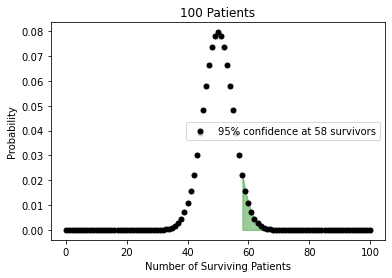

In [65]:
n, p = 100, 0.5
x = np.arange(0,101)
h0 = binom.pmf(x, n, p)  # make the binomial for h0
prob = binom.cdf(x, n, p) # cumulative distn
num_survivors = int(np.min(x[prob >= 0.95])) # how many survivors to reject the
                                             # null hypothesis at 95% confidence

fig, ax = plt.subplots()
ax.plot(x, h0, 'ko', ms=5, label=f'95% confidence at {num_survivors} survivors')
ax.fill_between(x[prob >= 0.95], h0[prob >= 0.95], color="green", alpha=0.4)
ax.legend()
ax.set_title(f"{n} Patients")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Surviving Patients");

**B.** Her hospital's medical ethics board advises her that if the treatment proves to be very effective, then it would be unethical to continue the study. Instead, she should end the study early and publish the results so that other patients can benefit from the treatment. Therefore she modifies the study. Starting after the first 25 patients are treated, she counts up how many patients have recovered, and calculates the probability that at least that many would have recovered just by chance. If this probability is less than 1%, she will end the study immediately and reject the null hypothesis, concluding that the treatment is effective. She continues to calculate this probability after each additional patient is treated until the treatment has proven effective or until she has treated 100 patients. The treatment is deemed successful if either the study ended early due to its apparent effectiveness, or if after 100 patients the number of recovered patients is greater than that calculated in Part A. In these two cases she will either write a paper saying that the treatment proved effective at the 99% CL or at the 95% CL, depending on whether the trial ended early or not.

Suppose that in reality the treatment has no effect on patient outcomes. What is the probability that the null hypothesis is rejected anyway? What is the probability that researcher publishes a paper rejecting the null hypothesis at the 99% CL?

---

In [38]:
def trigger_end(n, threshold):
    '''
    determine how many patients need to survive to assert xx% confidence that
    the treatment works, given a sample of n patients and a threshold value
    '''
    x = np.arange(0, n + 1)
    p = 0.5
    h0 = binom.pmf(x, n, p)
    prob = binom.cdf(x, n, p)
    num_survivors = int(np.min(x[prob >= threshold]))
    
    return num_survivors

In [217]:
def simulate_trial(numtrials):
    """
    monte carlo simulation for achieving a 99% confidence result under
    the null hypothesis that the proposed treatment is completely
    ineffective
    """
    
    # threshold values for patients 25-100
    ntrigger = np.array([trigger_end(n, 0.99) for n in range(25,101)])

    # initialize the array
    survivors = np.zeros((numtrials, 76))
    
    # simulate the first 25 patients
    survivors[:,0] = np.random.binomial(25, 0.50, numtrials)
    
    # simulate the next 75, stopping if the 99% confidence threshold is reached
    # each new "patient" is a coin flip with 50/50 odds of surviving
    for i in range(1,76):
        
        survivors[:,i] = survivors[:,i-1] + np.random.randint(0,2,size=numtrials)
        
        # cut out any trials that merit a 99% paper 
        survivors[:,i][survivors[:,i] > ntrigger[i]] = np.nan 
          
    return survivors, ntrigger

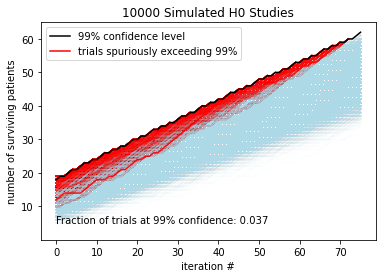

In [246]:
ntrials = 10000
sim, nsurv = simulate_trial(ntrials)

# separate "successes" from "failures" (all are random chance)
for s in sim:
    if np.isnan(sum(s)):
        plt.plot(s, color="red")
    else:
        plt.plot(s, color="lightblue", alpha=0.03)

# plot the results
plt.plot(nsurv, "k", label="99% confidence level")
plt.plot(np.nan, np.nan, color="r", label="trials spuriously exceeding 99%")
plt.xlabel("iteration #")
plt.ylabel("number of surviving patients")
plt.title(f"{ntrials} Simulated H0 Studies")
plt.legend()

# what fraction of studies are terminated early?
result = sim[:,-1]
successes = len(result[np.isnan(result)])
frac = successes / ntrials
plt.annotate(f"Fraction of trials at 99% confidence: {frac}", (0,5));

*With the course of action recommended by the ethics board, a useless treatment is 370\% more likely to be approved than was intended. A properly designed experiment would have a 1% chance of erroneously approving a treatment at the 99% confidence level, not 3.7% as calculated here*

## Question 2

**A.** A theory predicts that a variable y depends on a variable x according to: y = 3x2 -1

The following data set is obtained:

In [256]:
x = np.linspace(0.1, 1, 10)
y_theor = 3 * x ** 2 - 1
y_meas = np.array(
    [-0.951, -0.842, -0.741, -0.492, -0.229, 0.118, 0.494, 0.957, 1.449, 2.055]
)

The resolution on each y measurement is 0.02. Use a chi^2 statistic to test whether the data are consistent with the theory. Quote a P value.

---

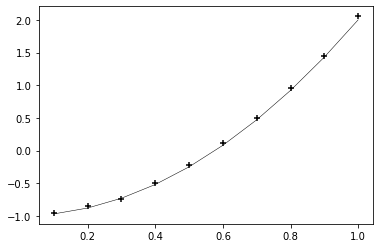

In [262]:
fig, ax = plt.subplots()
ax.plot(x, y_theor, "k", linewidth=0.5)
ax.scatter(x, y_meas, color='k', marker="+")
#ax.errorbar(x, y_meas, yerr=0.02, fmt="none")

**B.** Your graduate student now comes to you with worries about a possible systematic on the measured y values. She suspects that each y value could be shifted by an amount dy=ax, where a is some constant. Through diligent work she has determined that a=0±0.05. Repeat the calculation of Part A, this time including the effects of this systematic uncertainty.

---

## Question 3 

3. Suppose that the proportion $p$ of defective items in a large manufactured lot is unknown, and that it is desired to test the following simple hypotheses:

$$
H_0: p=0.3
$$

$$
H_1: p=0.4
$$

Suppose that the prior probability of H0 is 1/4 and the prior probability of H1 is 3/4. Also assume that the loss from choosing an incorrect decision is $1 and the loss from choosing a correct decision is 0. Suppose that a random sample of n items is selected from the lot. Show that the Bayesian test procedure that minimizes the loss is to reject H0 if and only if the proportion of defective items in the sample is greater than [ln (7/6) + (1/n)(ln (1/3)) ]/ln (14/9)

---

First compute the odds ration from Gregory 3.14

$$
O_{ij} = \frac{P(M_i|I)}{P(M_j|I)}\frac{P(D|M_i,I)}{P(D|M_j,I)}\tag{G3.14}
$$

The prior odds ratio is given:

$$
\frac{P(M_i|I)}{P(M_j|I)} = \frac{H_0}{H_1} = \frac{0.25}{0.75} = \frac{1}{3}
$$